# 1. Import bibliotek

In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
print(os.getcwd())

/content


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/SUML/datasets")

# 2. Przygotowanie danych

In [5]:
train = pd.read_csv("DSP_6.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2.1. Brakujące dane

In [7]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<Axes: >

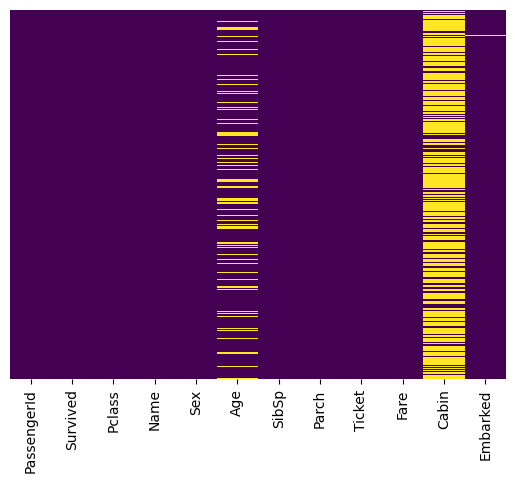

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [9]:
train.drop(columns=["Cabin"], inplace=True)

<Axes: >

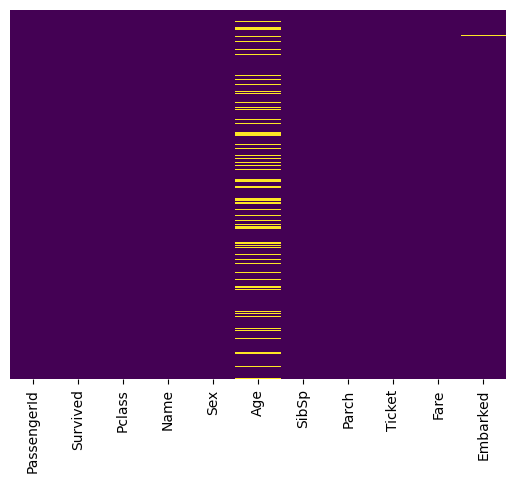

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [11]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [12]:
train.fillna(train.mean(numeric_only=True), inplace=True)

<Axes: >

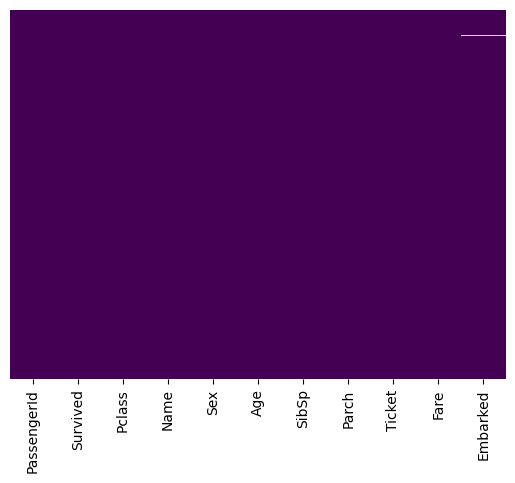

In [13]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [14]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [15]:
train.dropna(inplace=True)

<Axes: >

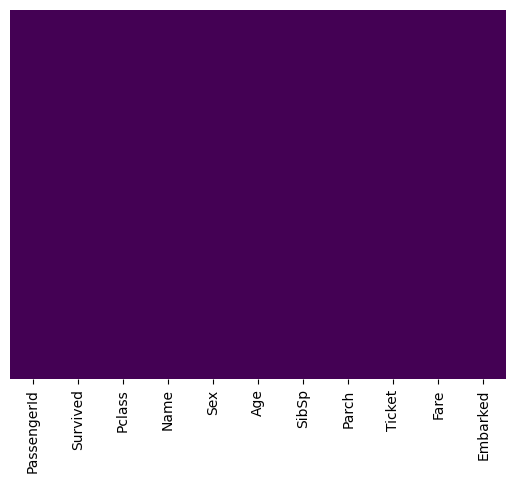

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [17]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

# 2.2. Eksploracja danych

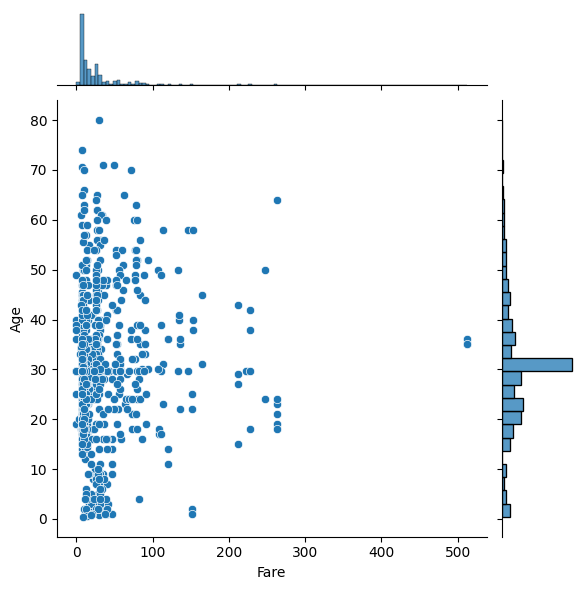

In [18]:
sns.jointplot(x="Fare", y="Age", data=train)

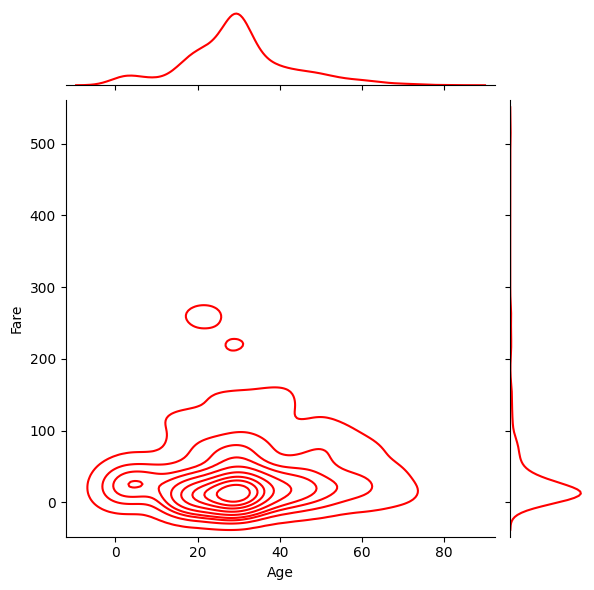

In [19]:
sns.jointplot(x="Age", y="Fare", data=train, color="red", kind="kde")

<Axes: xlabel='Survived', ylabel='count'>

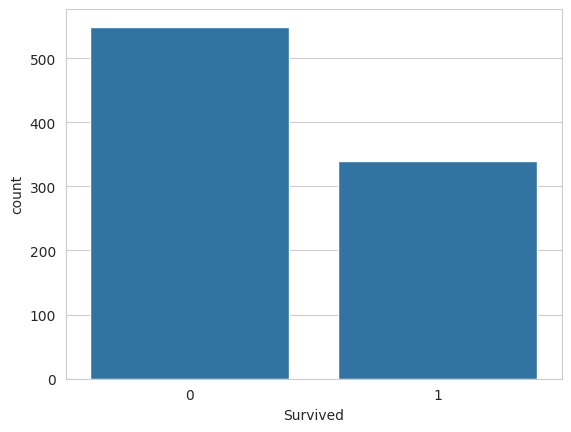

In [20]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train)

<Axes: xlabel='Survived', ylabel='count'>

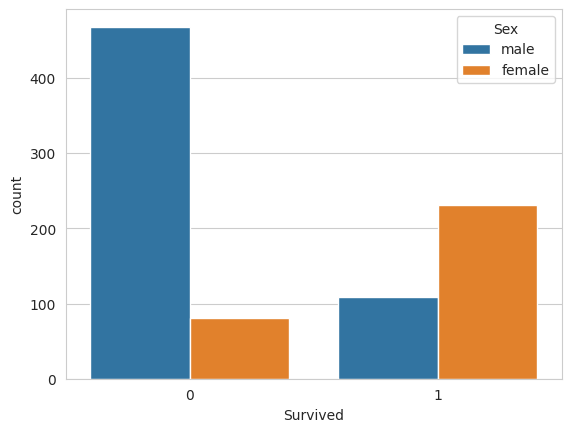

In [21]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

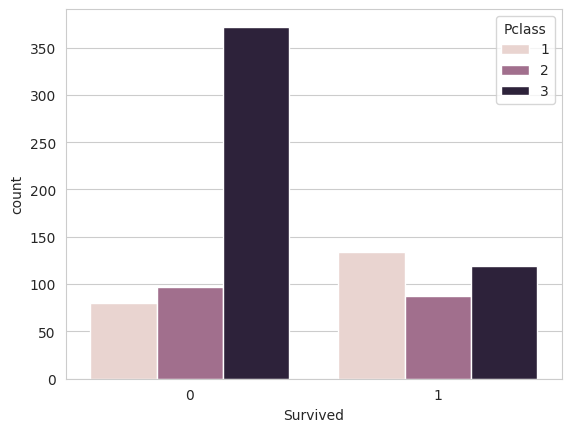

In [22]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Pclass")

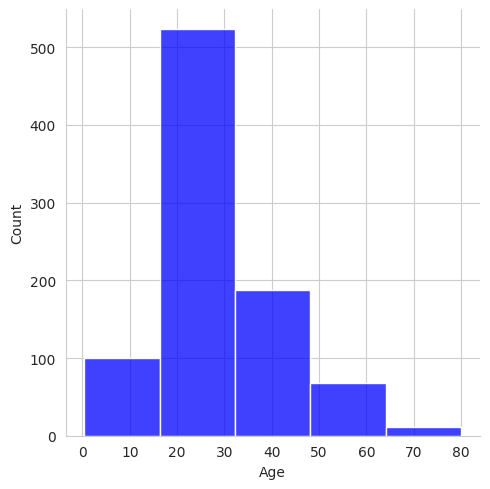

In [23]:
sns.displot(train["Age"], kde=False, color="blue", bins=5)

<Axes: xlabel='Pclass', ylabel='Age'>

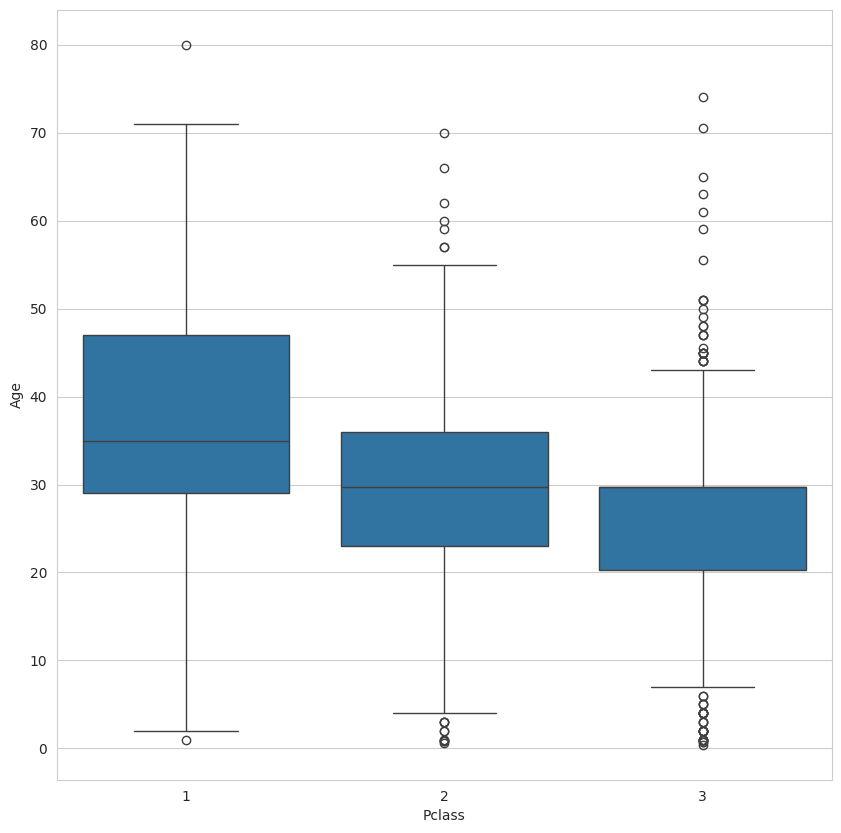

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Pclass", y="Age", data=train)

In [25]:
cf.go_offline()

In [26]:
train["Age"].iplot(kind="hist", bins=20, color="green")

# 2.3. Konwersja zmiennych do modelu regresji

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
sex = pd.get_dummies(train["Sex"], drop_first=True, dtype="int")
# embark = pd.get_dummies(train["Embarked"], drop_first=True, dtype="int")

In [29]:
lab_enc = LabelEncoder()
train["Embarked"] = lab_enc.fit_transform(train["Embarked"])

In [30]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [31]:
train = pd.concat([train, sex], axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,1


In [33]:
train.drop(["Sex", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


# 3. Trenowanie modelu

In [35]:
X = train.drop(["Survived"], axis=1)
y = train["Survived"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [38]:
def model(X_train, y_train):
  forest = RandomForestClassifier(n_estimators=10, random_state=0)
  forest.fit(X_train, y_train)
  print(f"Las: {forest.score(X_train, y_train)}")

  lreg = LogisticRegression(max_iter=500)
  lreg.fit(X_train, y_train)
  print(f"Regresja logistyczna: {lreg.score(X_train, y_train)}")

  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)
  print(f"Drzewa decyzyjne: {tree.score(X_train, y_train)}")

  return forest, lreg, tree

forest, lreg, tree = model(X_train, y_train)

Las: 0.97
Regresja logistyczna: 0.7975
Drzewa decyzyjne: 0.98375


In [40]:
y1_predict = forest.predict(X_test)
print(f"Random Forest {accuracy_score(y_test, y1_predict)}")

y2_predict = lreg.predict(X_test)
print(f"Logistic Regresion {accuracy_score(y_test, y2_predict)}")

y3_predict = tree.predict(X_test)
print(f"Decision Tree {accuracy_score(y_test, y3_predict)}")

Random Forest 0.7865168539325843
Logistic Regresion 0.8426966292134831
Decision Tree 0.7415730337078652


In [41]:
print("Ocena modelu 1. Las")
print(classification_report(y_test, y1_predict))

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        57
           1       0.69      0.75      0.72        32

    accuracy                           0.79        89
   macro avg       0.77      0.78      0.77        89
weighted avg       0.79      0.79      0.79        89



In [42]:
print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y_test, y2_predict))

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        57
           1       0.82      0.72      0.77        32

    accuracy                           0.84        89
   macro avg       0.84      0.82      0.82        89
weighted avg       0.84      0.84      0.84        89



In [43]:
print("Ocena modelu 3. Drzewa decyzyjne")
print(classification_report(y_test, y3_predict))

Ocena modelu 3. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        57
           1       0.61      0.78      0.68        32

    accuracy                           0.74        89
   macro avg       0.73      0.75      0.73        89
weighted avg       0.77      0.74      0.75        89



# 4. Eksport modelu

In [46]:
filename = "model2.h5"
pickle.dump(lreg, open(filename, "wb"))